In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as m_s_e
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

%matplotlib inline

In [5]:
data = pd.read_csv("housing.tsv", delimiter="\t")
print(data.shape)
print(len(str(data.shape))*'-')
print(data.dtypes.value_counts())
data.head(10)

(2930, 82)
----------
object     43
int64      28
float64    11
dtype: int64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


#### Data Cleaning and Feature Preparation

This dataset has 82 columns and 2930 rows. We'll be using the linear regression model, which only takes numerical values, although categorical values can be converted. Some initial notes on data cleaning:

The 'Order' and 'PID' columns can be removed since they are only used for identification.

'Year built' and 'Year Remod/Add' don't both need to be in the model, and can be replaced by a single feature. We can generate a new column which determines how old the house is since the last remodelling.

We want to drop columns with too many missing values, and can start with 5% as the threshold.

We don't want to leak sales information to our model. Sales information will not be available to us when we actually use the model to estimate the price of a house.

In [6]:
data['years_to_sell'] = data['Yr Sold'] - data['Year Remod/Add'] 
data = data[data['years_to_sell'] >= 0]

data = data.drop(['Order', 'PID'], axis=1)

data = data.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'], axis=1)

is_null_counts = data.isnull().sum()
features_col = is_null_counts[is_null_counts < 2930*0.05].index


data = data[features_col]
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_to_sell
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,P,210,62,0,0,0,0,0,215000,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Y,140,0,0,0,120,0,0,105000,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Y,393,36,0,0,0,0,12500,172000,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Y,0,0,0,0,0,0,0,244000,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Y,212,34,0,0,0,0,0,189900,12


We'll write some initial placeholder functions, which will eventually be filled with feature transformation, feature selection, and parameters for training and testing:

In [7]:
def transform_features(df):
    return df

In [8]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [9]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ['integer', 'float'])
    numeric_test = test.select_dtypes(include = ['integer', 'float'])
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])

    test_mse = m_s_e(test['SalePrice'],test_predictions)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse
    
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55275.367312413066

Note - ignore this value for now

In [10]:
num_missing = data.isnull().sum()
num_missing

MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
                   ..
Heating             0
Heating QC          0
Central Air         0
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qu

Filter series to drop anything missing more than 25%:

In [11]:
drop_missing = num_missing[(num_missing > len(data)/4)].sort_values()
data = data.drop(drop_missing.index, axis = 1)

In [12]:
data.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
                   ..
Heating             0
Heating QC          0
Central Air         0
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qu

Numerical columns: For columns with missing values, fill in with mode:

In [14]:
num_missing = data.select_dtypes(include = ['float', 'int']).isnull().sum()
#fixable_columns have more than one, less than 25% missing:
fixable_numeric = num_missing[(num_missing <
                               len(data)/4) &
                              (num_missing > 0)].sort_values()
fixable_numeric

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

Compute the most common value for each column in `fixable_numeric_missing_cols`.

In [15]:
replacement_values = data[fixable_numeric.index].mode().to_dict(orient = 'records')[0]

In [16]:
replacement_values

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

replace with replacement_values. Following command shows an advantage of dictionaries

In [17]:
data = data.fillna(replacement_values)

Now only columns with missing values should be text

In [18]:
data.isnull().sum().value_counts()

0     59
80     3
83     1
81     1
23     1
1      1
dtype: int64

In [19]:
data.dtypes.value_counts()

object     32
int64      25
float64     9
dtype: int64

In [20]:
num_missing_text = data.select_dtypes(include = ['object']).isnull().sum()

In [21]:
num_missing_text

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
dtype: int64

In [22]:
num_missing_num = data.select_dtypes(include = ['int','float']).isnull().sum()

In [23]:
num_missing_num

MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
years_to_sell      0
dtype: int64

Get rid of data with missing text values:

In [24]:
#Series object: column name -> number of missing values
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

data = data.drop(drop_missing_cols_2.index, axis=1)

In [25]:
data.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars  

In [26]:
data.isnull().sum().value_counts()

0    59
dtype: int64

### Now we can update transform features with previous changes

In [38]:
data = pd.read_csv("housing.tsv", delimiter="\t")

In [39]:
def transform_features(df):
    #drop columns with more than 25% missing values
    num_missing = df.isnull().sum()
    drop_missing = num_missing[(num_missing > len(df)/4)].sort_values()
    df = df.drop(drop_missing.index, axis=1)
    #Numerical columns: For columns with missing values, fill in with mode
    num_missing = df.select_dtypes(include = ['float', 'int']).isnull().sum()
    #fixable_columns have more than one, less than 25% missing:
    fixable_numeric = num_missing[(num_missing < len(df)/4) & (num_missing > 0)].sort_values()
    replacement_values = df[fixable_numeric.index].mode().to_dict(orient = 'records')[0]
    df = df.fillna(replacement_values)
    #For now, get rid of text columns with missing values
    ## Series object: column name -> number of missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    ## Filter Series to columns containing *any* missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    #look at creating some columns that better capture relationships: eg year info
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['years_sold'] = years_sold
    df['years_since_remod'] = years_since_remod
    #drop nonsensical rows, where year count is negative:
    df = df.drop([1702,2180,2181], axis = 0)
    #drop original columns
    #Drop features that arent going to be useful for ML like Parcel ID (PID)
    #Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", 
                  "Sale Condition", "Sale Type", "Yr Sold",
                 "PID", "Order", 'Year Remod/Add'], axis = 1)
    return df

In [40]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [41]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ['integer', 'float'])
    numeric_test = test.select_dtypes(include = ['integer', 'float'])
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])

    test_mse = m_s_e(test['SalePrice'],test_predictions)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [42]:
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55275.367312413066

This is not a great result but more can be done:

In [43]:
numeric_data = transform_data.select_dtypes(include = ['integer', 'float'])
numeric_data

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_sold,years_since_remod
0,20,141.0,31770,6,5,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,215000,50,50
1,20,80.0,11622,5,6,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,105000,49,49
2,20,81.0,14267,6,6,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,172000,52,52
3,20,93.0,11160,7,5,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,244000,42,42
4,60,74.0,13830,5,5,1997,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,189900,13,12
5,60,78.0,9978,6,6,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,195500,12,12
6,120,41.0,4920,8,5,2001,0.0,616.0,0.0,722.0,...,0,0,170,0,0,0,0,213500,9,9
7,120,43.0,5005,8,5,1992,0.0,263.0,0.0,1017.0,...,0,82,0,0,144,0,0,191500,18,18
8,120,39.0,5389,8,5,1995,0.0,1180.0,0.0,415.0,...,237,152,0,0,0,0,0,236500,15,14
9,60,60.0,7500,7,5,1999,0.0,0.0,0.0,994.0,...,140,60,0,0,0,0,0,189000,11,11


Visualising correlation coefficients between saleprice and other numerical features

In [44]:
#visualising correlation coefficients
corr_coefs = numeric_data.corr()['SalePrice'].abs().sort_values()
corr_coefs

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Are

0.3 is a fairly arbitrary cutoff, but the point is that features with low correlation wont be of any use to a linear regression model:

In [45]:
#can also drop from dataframe if less than 0.3
transform_data = transform_data.drop(corr_coefs[corr_coefs < 0.3].index, axis = 1)

In [46]:
corr_above3 = corr_coefs[corr_coefs > 0.3]
corr_above3

Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [47]:
sorted_corr_above3 = corr_above3.abs().sort_values()
sorted_corr_above3

Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [48]:
corrmat = numeric_data[sorted_corr_above3.index].corr()

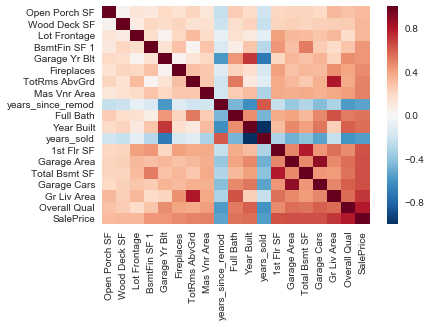

In [49]:
sns.heatmap(corrmat)

Strong correlations with Saleprice: OverallQual, Gr Liv Area

Reasonably Strong correlation with SalePrice: 1st Flr SF, Garage Area, Total Bsmt SF, Garage Cars

Negative Correlations with SalePrice: years sold and years since remod

Columns that are correlated with each other: Tot Rooms Above Ground/Gr Liv Area, Year Built/Garage Year Built, Bsmt Fin SF 1/Total Bsmt SF, Gr Liv Area/Full Bath, Total Bsmt SF/1st Floor SF, Garage Cars/Garage Area, Years Sold/Years Since Remod

Columns that are negatively correlated with each other: Years Sold/Garage Year Built, Years Since Remod/Garage Year Built, Overall Qual/Years Sold, Overall Qual/Years since remod, Garage Cars/Years Sold, Garage Cars/Years Since remod

We need to think about which columns should be converted to categorical features. If they are listed as nominal, they should be strong candidates:

Nominal:

MS SubClass, MS Zoning, Street, Alley, Land Contour, Lot Config, Neighbourhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1, Exterior 2, Mas Vnr Type, Foundation, Heating, Central Air, Garage Type, Misc Feature, Sale Type, Sale Condition

No categories with 100s of possible values

Next check columns with mostly same value, and create categorical list

In [50]:
categorical = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
               'Lot Config','Neighbourhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
               'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
               'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
               'Misc Feature', 'Sale Type', 'Sale Condition']

Now look at columns that are numerical but whose numbers dont have any semantic meaning

In [51]:
num_no_meaning = ['Overall Qual', 'Overall Cond']

Check if categoricals still in transform_data:

In [52]:
transform_cat_cols = []
for col in categorical:
    if col in transform_data:
        transform_cat_cols.append(col)
        
#How many unique values are in each column?
unique_counts = transform_data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
#drop if more than 15 to avoid length of dataset blowing out
#In a more comprehensive example this would be done with a bit more care
drop_cat = unique_counts[unique_counts > 15].index
transform_data = transform_data.drop(drop_cat, axis = 1)

Now update select features:

In [53]:
def transform_features(df):
    #drop columns with more than 25% missing values
    num_missing = df.isnull().sum()
    drop_missing = num_missing[(num_missing > len(df)/4)].sort_values()
    df = df.drop(drop_missing.index, axis=1)
    #Numerical columns: For columns with missing values, fill in with mode
    num_missing = df.select_dtypes(include = ['float', 'int']).isnull().sum()
    #fixable_columns have more than one, less than 25% missing:
    fixable_numeric = num_missing[(num_missing < len(df)/4) & (num_missing > 0)].sort_values()
    replacement_values = df[fixable_numeric.index].mode().to_dict(orient = 'records')[0]
    df = df.fillna(replacement_values)
    #For now, get rid of text columns with missing values
    ## Series object: column name -> number of missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    ## Filter Series to columns containing *any* missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    #look at creating some columns that better capture relationships: eg year info
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['years_sold'] = years_sold
    df['years_since_remod'] = years_since_remod
    #drop nonsensical rows, where year count is negative:
    df = df.drop([1702,2180,2181], axis = 0)
    #drop original columns
    #Drop features that arent going to be useful for ML like Parcel ID (PID)
    #Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", 
                  "Sale Condition", "Sale Type", "Yr Sold",
                 "PID", "Order", 'Year Remod/Add'], axis = 1)
    return df

def select_features(df, coef_threshold = 0.3, uniq_threshold = 15):
    numeric_data = df.select_dtypes(include = ['integer', 'float'])
    abs_corr_coefs = df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(corr_coefs[abs_corr_coefs < coef_threshold].index, axis = 1)
    categorical = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
               'Lot Config','Neighbourhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
               'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
               'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
               'Misc Feature', 'Sale Type', 'Sale Condition']
    transform_cat_cols = []
    for col in categorical:
        if col in df:
            transform_cat_cols.append(col)
    #How many unique values are in each column?
    unique_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    #drop if more than 15 to avoid length of dataset blowing out
    #In a more comprehensive example this would be done with a bit more care
    drop_cat = unique_counts[unique_counts > uniq_threshold].index
    df = df.drop(drop_cat, axis = 1)
    #now take care of categoricals
    text_cols = df.select_dtypes(include = ['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include = ['category']))], axis = 1)
    return df

#### Now linear regression with cross validation can be done:

In [78]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include = ['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train['SalePrice'])
        test_predictions = lr.predict(test[features])
        test_mse = m_s_e(test['SalePrice'],test_predictions)
        test_rmse = np.sqrt(test_mse)
        return test_rmse
    
    if k == 1:
        df = shuffle(df)
        fold_one = df[:1460]
        fold_two = df[1460:]
        lr.fit(fold_one[features], fold_one['SalePrice'])
        test_predictions_1 = lr.predict(fold_two[features])
        test_1_mse = m_s_e(fold_two['SalePrice'],test_predictions_1)
        test_1_rmse = np.sqrt(test_1_mse)
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        test_predictions_2 = lr.predict(fold_one[features])
        test_2_mse = m_s_e(fold_one['SalePrice'],test_predictions_2)
        test_2_rmse = np.sqrt(test_2_mse)
        average_rmse = (test_1_rmse+test_2_rmse) / 2
        return average_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = m_s_e(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("housing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse
        

[34270.194363586204, 23695.926505699153, 22233.693745835775, 28220.923307200039]


27105.18448058029

In [73]:
for i in range(4,20):
    rmse = train_and_test(filtered_df, k=i)
    print(rmse)

[25035.782266988288, 24906.05717530103, 24896.790736713294, 35306.677029916638]
27536.3268022
[25229.085548593659, 36413.129691526075, 21586.890005674493, 26868.233355389093, 25811.128973743394]
27181.693515
[24718.925803132886, 23683.75627287331, 24756.911954504514, 25265.649693196603, 38502.005168755168, 26193.007497102521]
27186.7093983
[40439.095420586062, 24578.902025440708, 24297.033229887755, 26201.223253932108, 23688.395393757226, 25216.117667533592, 25615.199355715758]
27147.9951924
[28061.121472766346, 25414.539871593737, 24188.810084450954, 23056.089645205131, 26495.03500639505, 42346.547352526191, 22160.041979074202, 22249.019879418396]
26746.4006614
[25738.805693484192, 43720.256531051367, 27845.618392256958, 25189.074581184559, 27774.569113669928, 24992.868932542893, 23778.323291043991, 23289.747567192386, 19920.80478886094]
26916.6743213
[23891.765139885432, 25238.304392783288, 23774.881027749139, 25919.493170416445, 23283.042151692443, 22867.293108239061, 27373.99879767

[30791.386247873921, 26013.837191089478]
[33202.9902629055, 25564.810168719643, 24742.644970811987]
[24455.374263080019, 36900.741066114657, 24785.441890245474, 23952.180594404686]
[25832.670727630517, 37910.540666175424, 26706.122896132551, 21728.14352365263, 23269.79462996755]
[24373.19159391944, 23818.941778472894, 26802.724178547211, 25072.24504554546, 25016.756841048216, 39174.645749423777]
[24339.120120174066, 24818.338808811302, 20065.483319996667, 21501.527016282082, 26090.610694128693, 42104.770124284631, 28829.864274415613]
[26489.477365109597, 42378.656798893222, 26965.787405558003, 25664.907900608763, 23092.431802249514, 21525.489562810129, 26117.534797522942, 24635.492831199434]
[21886.460050609167, 23710.712152809672, 23960.512198435747, 24846.798766360404, 43599.903856011326, 26090.584187443103, 23909.439443271836, 28779.794086825485, 24721.209335601718]
[22570.977815903363, 25090.624860237433, 25621.936448991793, 29736.219833465278, 45693.333158832123, 21324.16547777815

[21163.707810984484, 24536.056658674792, 21488.685541564431, 22366.791952485481, 26849.886950339282, 23080.286170436018, 27314.528754813738, 18025.22285612546, 28953.778907220814, 21061.173956254861, 20885.865154918265, 29233.39183069532, 25335.302778124897, 25875.921979256997, 25009.414646098616, 22041.87054588323, 27024.91372629855, 28203.374849585121, 70640.880387062251, 26294.210912660521, 20067.666189662912, 24340.471323420432, 30585.984446302122, 19501.674602019244, 31371.969605943705, 24986.211482832179, 22153.287332601063, 29865.98304640218, 18549.091735921345, 26277.916537593759]
[19646.563786601608, 22467.936592449998, 20883.133394694349, 23404.702695493248, 19709.274347759685, 26062.384991632214, 18811.694530997553, 26740.63720392399, 24241.761534024725, 23345.701495645648, 21690.902195626993, 22988.593864362065, 19831.291683338146, 25278.044987040314, 26504.905444331849, 24677.937452735361, 74619.99546143625, 26147.710577916456, 22305.741488727286, 27919.858055487628, 20788

[28658.179279194599, 23057.67283769702, 24574.922117331556, 19441.846542185391, 24176.631479018182, 21996.257587658893, 27107.68426630722, 25247.656412525826, 22236.5801350849, 20752.972773451726, 31035.318388447104, 34286.231258755703, 21365.337817648076, 28097.792594839688, 26175.800336811462, 20001.936844099426, 23274.282407109746, 29932.418885697098, 19538.059776400663, 17929.848657037073, 20961.377762872631, 20736.283360796908, 26503.008220222699, 24581.491511730241, 16954.00351840851, 18767.273603076497, 16906.769112372822, 32490.992488210417, 22264.397305496303, 25992.989474835817, 20854.636055581435, 27783.133194845053, 31512.27171282428, 33779.734264420767, 27612.390066228687, 24888.109129014178, 24700.733921582996, 83345.333359471741, 20805.033892181476, 20268.953800554897, 20248.817940281806, 27735.263928276789]
[23684.856162530406, 82223.865332060566, 33315.045968232924, 21586.849390194322, 24982.372715458183, 24607.425624073741, 22045.046595479271, 19138.950674186035, 2086

[19432.472655595269, 19859.638512458663, 25289.419626143772, 19292.941525096379, 27988.713286867889, 24909.536770931434, 30800.406520881617, 91510.020981527254, 18849.647195028043, 28287.937320725454, 14961.21758041708, 20769.811486632185, 21451.092732386889, 19298.641546632221, 25539.301116963896, 31115.885370244207, 34776.838591507178, 35230.107935900967, 36940.707509174266, 30982.641376058953, 18630.907178067133, 19707.935182882229, 21744.761865968001, 16962.303446229336, 23148.453233250497, 30907.439725974298, 22462.15899584796, 21990.371133084096, 28722.448092058694, 17092.806784487104, 17807.354786845357, 18258.757294482086, 43323.999328242513, 20717.161566155399, 22485.3649173882, 20695.867989338087, 19745.214028465281, 30924.294697989702, 19109.196611699594, 24651.467848112203, 18546.339052199044, 24508.700411093279, 28377.888839185922, 19759.823917480149, 15773.429476320198, 24229.892171731699, 27096.868249461881, 23754.012975895595, 21438.47439335423, 20074.360906479749, 2098

[99661.311192788329, 15806.103998522203, 15861.085109827525, 30282.612489602918, 30659.399276633423, 18410.910780082635, 19006.038117534266, 28073.372306357855, 30269.561145117612, 32793.403218265688, 27420.551446669582, 17286.091791622992, 17497.635837956557, 20918.746301551542, 20861.625345940141, 17330.45466217463, 23897.961368974491, 26747.55157320977, 22515.809859092846, 21217.399438355049, 27158.398558477933, 17368.695429034775, 26585.975575911332, 19932.667779861848, 26870.164719464075, 33987.298906478063, 20926.822676042444, 21799.359204490243, 18081.515779644247, 19236.088599050021, 15910.860974541365, 24242.973313792361, 35346.031149288843, 29810.414044649842, 20318.529464063453, 25362.40281018291, 18470.008500726388, 23938.676762857143, 21491.960881242565, 23404.837216611682, 30268.097045123232, 15142.18224330589, 25142.862515854318, 29746.937668346145, 17644.043470116787, 39826.985529466729, 26007.165310540262, 21939.220193105401, 24434.348480554247, 26783.929535122454, 230

[22093.046641151643, 23334.561534279259, 21254.796652291694, 24607.875120156517, 37073.031362018424, 24552.359385732492, 31262.815543668166, 29169.327170333392, 22402.85412665681, 17511.970339614301, 21151.04089820716, 22993.391211414048, 34839.79889638679, 21318.777992423704, 25605.010187445339, 13470.43388300723, 35560.463105587725, 25115.482414227838, 27659.419335034127, 25936.899837692719, 17693.036576878705, 23755.776532393698, 37110.710740584851, 23280.616095543486, 19769.823094655301, 26182.831223728685, 23085.946206317836, 14557.623668728542, 24231.164069835064, 28679.062597647422, 21511.011750759699, 30868.32727825216, 19564.468233514188, 21981.850622308601, 26811.21610646437, 15052.476447357349, 21024.04562554348, 24948.755616350492, 26138.447101303143, 27305.564039160665, 101922.81693397657, 20061.287017139304, 27359.743147639998, 21163.708544843863, 21256.575149229786, 20798.563062308844, 26883.950137692282, 30573.943672685698, 21225.355775541761, 27608.517913642059, 20493.

[31450.630806257956, 27395.734084358934, 15162.219922720778, 17857.830208750955, 25344.173637797358, 32817.265881166648, 17999.560731124191, 40524.864949466944, 39953.274464975351, 20712.984949751739, 15705.257722917127, 20766.139329959631, 19240.734160960161, 21107.502396679956, 22103.557842278817, 24990.046996800185, 34531.109481695239, 21619.660500925944, 38186.029070690623, 32997.358981409765, 26527.03884038885, 14358.758858257943, 21803.408747662779, 29135.161104561848, 27012.998076751566, 19776.68430712225, 26430.643564996037, 25097.210077756168, 18886.291001639427, 25005.546966440961, 28962.107098361852, 23208.898470334745, 23353.203880474866, 21546.631427421031, 20987.905998630773, 26042.35885817929, 16066.48418228727, 20698.593496122005, 17629.701900914079, 19887.783320736824, 24405.466824798048, 23884.344830465503, 26725.966214575965, 106965.88481581434, 22680.728584882854, 21238.087627922425, 17559.606610127848, 28387.438644019476, 21981.623285669197, 22306.605466261026, 245

[24343.7864258509, 25950.177231952966, 27025.725729709451, 111030.99425122261, 25936.746855568927, 43506.674021049417, 22633.932476380036, 21846.164794832945, 18382.967052682652, 22012.025843625575, 18260.419311180354, 20823.364999760772, 25991.803823162805, 20988.354629258531, 23162.580301212005, 25045.256655857924, 16082.583860036357, 37551.882285319291, 20823.700927374251, 29525.197796946781, 22759.650754787755, 29368.5858190824, 25219.213766585261, 23402.806048395571, 18000.640692366887, 18772.171430961716, 15422.949128949167, 36264.16594040161, 28867.852890934282, 26150.301605485965, 23081.800916337052, 17794.667877682226, 17181.619011148156, 22070.98369198283, 16421.360734569957, 37559.910376937252, 31072.453237336704, 29542.892845060469, 21774.427395485945, 19545.895158686497, 14231.533880462717, 33092.414110592239, 20616.636240003518, 22262.648382099236, 17466.078768993426, 25043.982837036991, 18623.231138107589, 24245.063940529388, 18741.932773026452, 16707.566257589941, 19381

[16929.881688142672, 18620.5974759991, 16637.106649777583, 34608.717891970598, 35141.565112292126, 17592.757268527097, 22283.244450219085, 23267.962822014215, 25182.032649428707, 26739.490375117628, 19527.801761574603, 23814.346411011615, 25046.020150072487, 23120.501311115611, 20189.436989490892, 22745.102681367898, 16156.949259108838, 20030.145695960531, 21283.214509216836, 15051.902001434422, 20544.545731919916, 114374.63380383023, 27484.257559308291, 27240.732226488479, 26614.977657018484, 21435.077395018416, 17425.789455023787, 25466.643331114112, 17222.168699227142, 21457.56454183234, 32646.007919606862, 24744.394906152316, 37355.371989054933, 25719.03922935377, 23498.759251541112, 20314.516452673532, 26319.089156396258, 19856.103662309633, 18169.140006826048, 30391.793870905345, 19155.249022847958, 21116.398488944571, 28763.838819861652, 16743.119985957914, 26911.543979235652, 32638.199144212882, 23723.640336149445, 22347.387309579444, 33103.233912517724, 14496.414320858816, 236

[25492.348112981592, 38866.140816966887, 32043.013940418063, 16164.668966059677, 26076.659552435762, 26310.288388213052, 17913.100021604325, 18670.24535373129, 20223.974636707848, 21848.491000151818, 43863.296691718679, 22466.237198794766, 18553.819880798706, 12865.761366875202, 17254.69822307854, 20252.537637007779, 19728.80309535284, 32915.544521921081, 22519.456841612031, 12433.945264789179, 26324.993288594265, 22543.167120704238, 21306.92142870116, 25890.070564469021, 23627.369139937582, 24758.69732277076, 30726.531074645358, 18151.348847013043, 38528.231047163776, 21617.196008481678, 26257.128272653517, 21822.967324516016, 22656.47456812258, 22294.707078947424, 16119.683377770189, 18789.992793864323, 32940.750268587384, 26436.992555032302, 120853.61385129116, 27305.097930351178, 19361.437601149693, 19106.656539357689, 26453.096701692801, 21161.589508401292, 35595.1073296709, 25637.458396856899, 22654.20753859873, 22753.123220963069, 21688.211389527609, 29537.762705855825, 22784.87

[20655.299290489726, 26136.147708814329, 21652.461212893981, 21333.391682308084, 15806.849363949641, 37708.362158262666, 14182.937897531963, 23152.637208303302, 20958.65302695179, 20543.124613833363, 24066.229571112286, 121793.63897163393, 23728.087336253222, 22096.641771430088, 30379.537441654236, 21701.288664950389, 17157.106243646103, 17864.233512126808, 30399.088586880753, 24934.900745227595, 26170.847109950064, 34452.006424659012, 17661.37771539548, 18492.19765326555, 36619.25909756239, 19199.660921106148, 19666.772524804263, 16464.794174721035, 16775.327533237785, 26889.418398609007, 18741.63275725528, 17467.560976685101, 14808.741520723495, 25688.542092817504, 20113.708501357843, 41589.77634541424, 34885.713628588826, 21373.026844257718, 23833.003040259642, 26215.871498114619, 25561.497057048073, 31015.077461589579, 31582.88097051634, 14758.37425901564, 40172.518509078764, 21838.561075279402, 24138.219424567902, 16442.196716643364, 24852.568622502979, 15166.857950947238, 23678.6

(0, 33000)

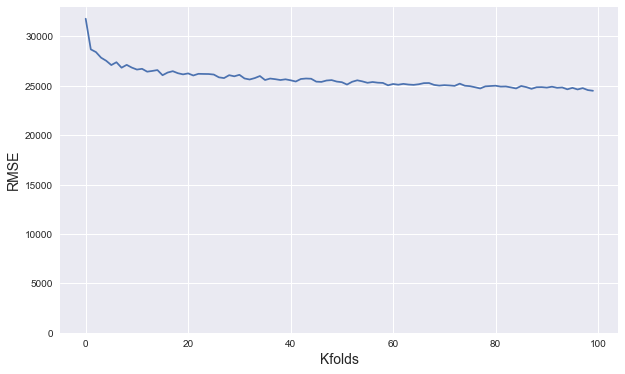

In [85]:
results = []
for i in range(100):
    result = train_and_test(filtered_df, k=i)
    results.append(result)

x = [i for i in range(100)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds', fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)
plt.ylim(0,33000)

While this choice of axis might appear to obscure the data, it is instructive that increasing the number of folds above a certain threshold doesn't improve the result much, but it still increases computation time significantly. In this case, around 60 folds looks like plenty.